## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [1]:
!pip install pandas_datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 1.6 MB/s eta 0:00:00 0:00:01


In [ ]:
import pandas_datareader.data as web
from datetime import datetime
data = web.DataReader('AAPL', 'iex', datetime(2017, 1,1), 
                      datetime(2018,12,31), api_key = 'pk_803a142bf6764826a701ef6d24725ccb')
data['close'].plot()


2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

Text(0.5, 1.0, 'Изменение среднего рейтинга трех рецептов')

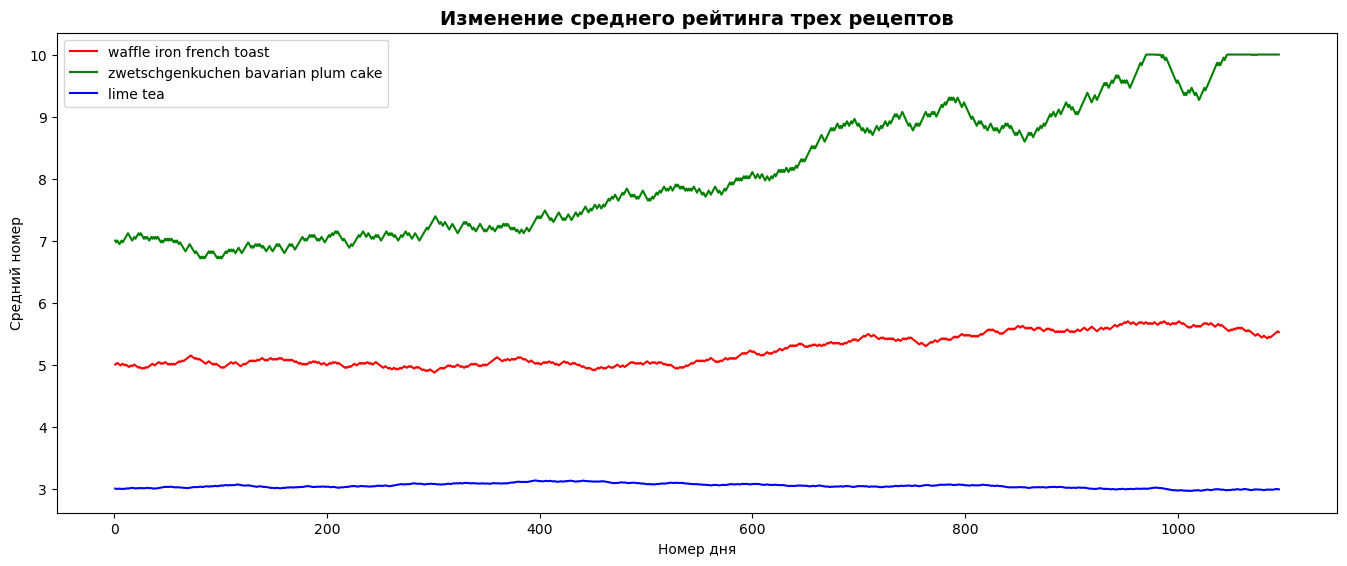

In [5]:
a = np.load("average_ratings.npy")
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 2, 1])
wa, = ax.plot(list(range(1, len(a[0])+1)), 
                  a[0], 'r', label = 'waffle iron french toast')
c, = ax.plot(list(range(1, len(a[1])+1)), 
                  a[1], 'g', label = 'zwetschgenkuchen bavarian plum cake')
te, = ax.plot(list(range(1, len(a[2])+1)), 
                  a[2], 'b', label = 'lime tea')

ax.legend(handles = [wa, c, te], loc = 'upper left')
plt.ylabel('Средний номер')
plt.xlabel("Номер дня")
#plt.suptitle("Изменение среднего рейтинга трех рецептов")
ax.set_title('Изменение среднего рейтинга трех рецептов',  fontsize=14, fontweight='bold')


2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


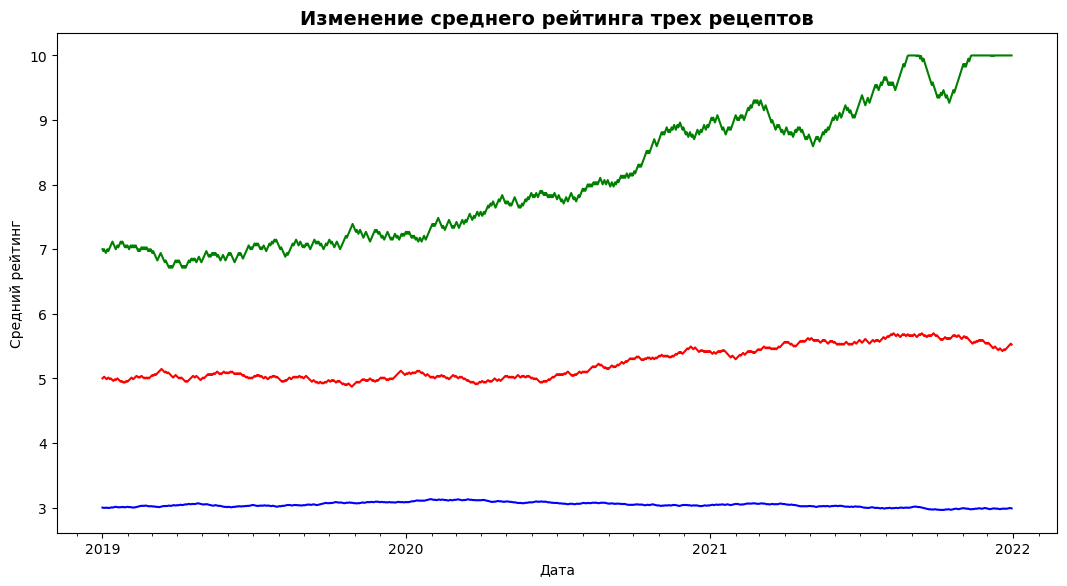

In [6]:
import datetime as dt
p = pd.date_range(start= '01-01-2019', end = '30-12-2021', freq = '1D')
import matplotlib.ticker as ticker
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 2, 1])
wa, = ax.plot(p,a[0], 'r', label = 'waffle iron french toast')
c, = ax.plot(p, a[1], 'g', label = 'zwetschgenkuchen bavarian plum cake')
te, = ax.plot(p, a[2], 'b', label = 'lime tea')

year = mdates.YearLocator()               
ax.xaxis.set_major_locator(year)
mon = mdates.MonthLocator()
ax.xaxis.set_minor_locator(mon)

plt.xlabel("Дата")
plt.ylabel("Средний рейтинг")
ax.set_title('Изменение среднего рейтинга трех рецептов',  fontsize=14, fontweight='bold')
fig.set_figwidth(5)
fig.set_figheight(5)


3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

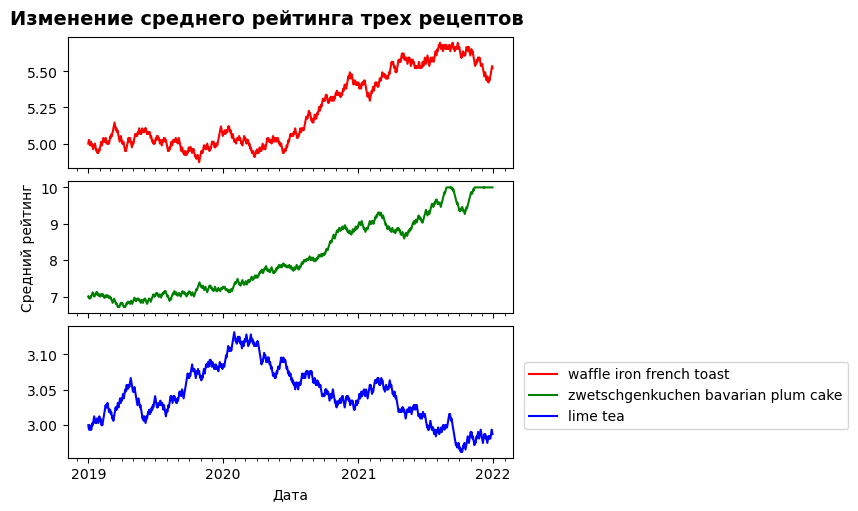

In [7]:
import datetime as dt
p = pd.date_range(start= '01-01-2019', end = '30-12-2021', freq = '1D')
import matplotlib.ticker as ticker

ax = fig.add_axes([0.1, 0.1, 2, 1])
fig, ax = plt.subplots(nrows = 3, ncols = 1,  layout = 'constrained', sharex = 'col')

wa, = ax[0].plot(p,a[0], 'r', label = 'waffle iron french toast')
c, = ax[1].plot(p, a[1], 'g', label = 'zwetschgenkuchen bavarian plum cake')
te, = ax[2].plot(p, a[2], 'b', label = 'lime tea')

year = mdates.YearLocator()               
ax[2].xaxis.set_major_locator(year)
mon = mdates.MonthLocator()
ax[2].xaxis.set_minor_locator(mon)

ax[2].set_xlabel('Дата')
ax[1].set_ylabel('Средний рейтинг')
plt.suptitle('Изменение среднего рейтинга трех рецептов',  fontsize=14, fontweight='bold')
fig.set_figwidth(5)
fig.set_figheight(5)
fig.legend(handles = [wa, c, te], loc = 'upper left', bbox_to_anchor=(1, 0.3))

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


Text(0.5, 1.06, 'Изменение количества пользователей в линейном и логарифмическом масштабе')

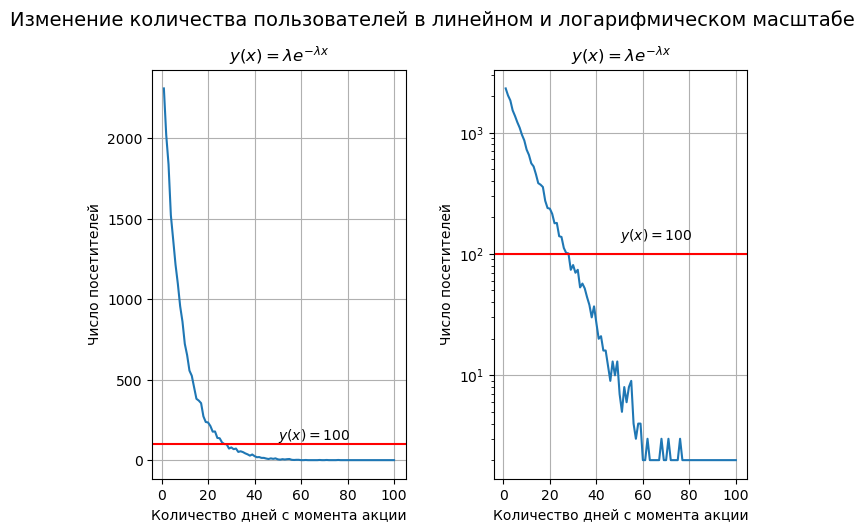

In [8]:
a = np.load("visitors.npy")
#fix, ax = plt.subplots(nrows = 1, ncols = 2,  layout = 'constrained', sharex = 'col')

fig = plt.figure(figsize=(7, 10))

plt.subplot(221)
plt.plot(list(range(1, len(a)+1)), a)
plt.yscale('linear')
plt.title('$y(x) = \lambda e^{-\lambda x}$')
plt.text(50, 130,"$y(x) = 100$")
plt.xlabel('Количество дней с момента акции')
plt.ylabel('Число посетителей')
plt.axhline(y = 100, color = 'r', linestyle = '-')
plt.grid(True)

plt.subplot(222)
plt.plot(list(range(1, len(a)+1)), a)
plt.yscale('log')
plt.title('$y(x) = \lambda e^{-\lambda x}$')
plt.text(50, 130,"$y(x) = 100$")
plt.xlabel('Количество дней с момента акции')
plt.ylabel('Число посетителей')
plt.axhline(y = 100, color = 'r', linestyle = '-')
plt.grid(True)

plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе',  fontsize=14, x = 0.5, y = 1.06)


## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [9]:
reviews = pd.read_csv('reviews_sample.csv')
reviews.rename(columns={'Unnamed: 0':'index'}, inplace = True)
recipes = pd.read_csv('recipes_sample.csv')

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

Text(0.5, 1.0, 'Размеры групп рецептов')

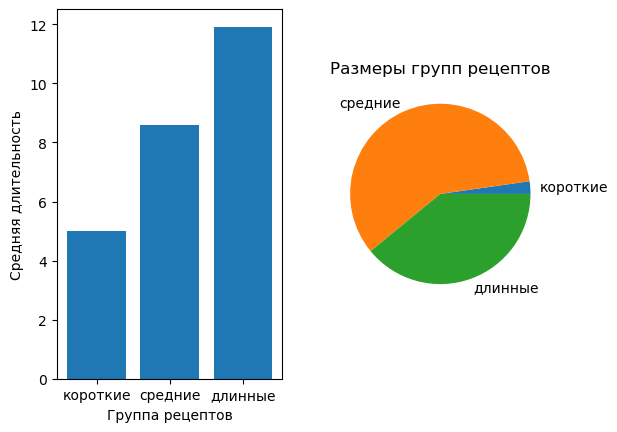

In [10]:
sh = recipes[recipes['minutes'] < 5]
sr = recipes[(recipes["minutes"] < 50) & (recipes["minutes"]>=5)]
dl = recipes[recipes["minutes"] >= 50] 

msh = sh.loc[:,'n_steps'].mean()
msr = sr.loc[:,'n_steps'].mean()
mdl = dl.loc[:,'n_steps'].mean()

ssh = sh.shape[0]
ssr = sr.shape[0]
sdl = dl.shape[0]

df = pd.DataFrame({'na':['короткие', 'средние', 'длинные'], 
                   'm':[msh, msr, mdl], 
                   's':[ssh, ssr, sdl]})

ax1 = plt.subplot(121)
plt.bar(list(df.index), df['m'])
plt.xticks(list(df.index), df['na'])
plt.xlabel('Группа рецептов')
plt.ylabel('Средняя длительность')
ax2 = plt.subplot(122)
plt.pie(df['s'], labels = df['na'])
plt.title('Размеры групп рецептов')


6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

In [ ]:
reviews['date']=pd.to_datetime(reviews['date'])
r2009 = reviews[(reviews['date'] <= '2009-12-31') & (reviews['date'] >= '2009-1-1')]
r2008 = reviews[(reviews['date'] <= '2008-12-31') & (reviews['date'] >= '2008-1-1')]
fig = plt.figure()

plt.subplot(221)
r2008['rating'].plot.hist(bins = 15)

plt.subplot(222)
r2009['rating'].plot.hist(bins = 15)
plt.subplots_adjust(wspace=1)
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах');

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

Text(0.5, 1.0, 'Диаграмма рассеяния n_steps и n_ingredients')

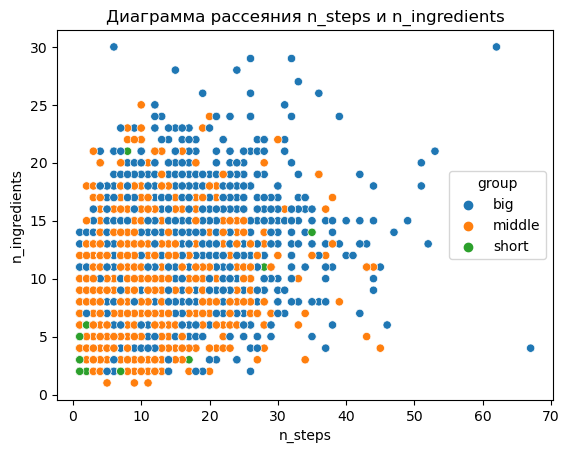

In [11]:
import seaborn as sns
recipes['group'] = None
recipes['group'] = np.where(recipes['minutes'] < 5, 'short', recipes['group'] )
recipes['group'] = np.where((recipes['minutes'] < 50) & (recipes['minutes'] >= 5), 'middle', recipes['group'])
recipes['group'] = np.where(recipes['minutes'] >= 50, 'big', recipes['group'] )

a =sns.scatterplot(data=recipes, 
                x="n_steps", 
                y="n_ingredients", 
                hue = 'group')
a.set_title('Диаграмма рассеяния n_steps и n_ingredients')


8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

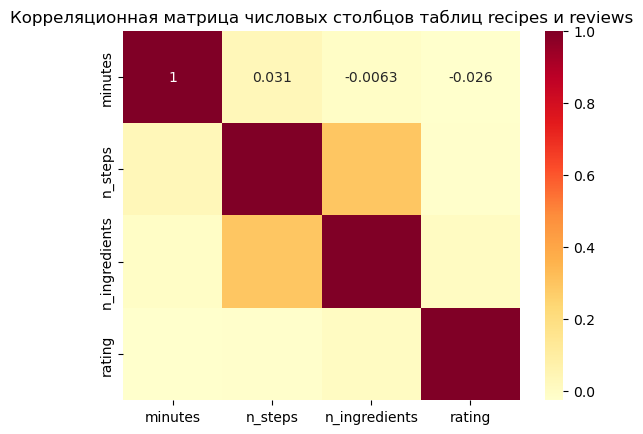

In [12]:
a = recipes.merge(reviews,how = 'right', left_on = 'id', right_on = 'recipe_id')
b = a[['minutes', 'n_steps', 'n_ingredients', 'rating']].corr()
c = sns.heatmap(b, annot=True, cmap = 'YlOrRd')
c.set_title('Корреляционная матрица числовых столбцов таблиц recipes и reviews');
